# Задания

1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
2. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
3. На каких платформах произошло больше всего релизов?
4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?
5. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

Описание данных. Имеются следующие поля:

1. Rank – место по объему продаж
2. Name – название игры
3. Platform – платформа, на которой выпущена игра
4. Year – год релиза
5. Genre – жанр
6. Publisher – издатель
7. NA_Sales – продажи в Северной Америке, в млн.
8. EU_Sales – продажи в Европе, в млн.
9. JP_Sales – продажи в Японии, в млн.
10. Other_Sales – продажи в остальном мире, в млн.
11. Global_Sales – продажи по всему миру, в млн.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Задание 1

Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [3]:
# читаем данные, сохраняем в переменную
df = pd.read_csv('games.csv')

In [4]:
df.isna().sum() # сколько пропущенных значений в каждом столбце


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df = df.dropna() #избавляемся от пропущенных значений

In [6]:
df.isna().sum() #проверяем исправления

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [7]:
# приводим названия столбцов к нижнему регистру
df=df.rename(columns={'Rank':'rank',
                     'Name':'name',
                     'Platform':'platform',
                     'Year':'year',
                     'Genre':'genre',
                     'Publisher':'publisher',
                     'NA_Sales':'na_sales',
                     'EU_Sales':'eu_sales',
                     'JP_Sales':'jp_sales',
                     'Other_Sales':'other_sales',
                     'Global_Sales':'global_sales'})
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Задание 2

Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [9]:
# группируем данные по году, считаем количество выпущенных игр по годам, сортируем по убыванию
years_games = df.groupby('year',as_index=False) \
    .agg({'name': 'count'}) \
    .sort_values('name', ascending=False)
years_games.head()

,year,name
29,2009.0,1431
28,2008.0,1428
30,2010.0,1257
27,2007.0,1201
31,2011.0,1136


In [10]:
years_games.name.sum() #посчитали, сколько всего выпущено игр

16291

In [11]:
years_games.query('year > 2007').name.sum() #посчитали, сколько выпущено игр после 2007 года

7993

In [12]:
df.describe() #вывели описательную статистику

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [13]:
stats.mode(df.year) #нашли моду, т.е. год, в котором чаще всего выпускали игры

ModeResult(mode=array([2009.]), count=array([1431]))

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


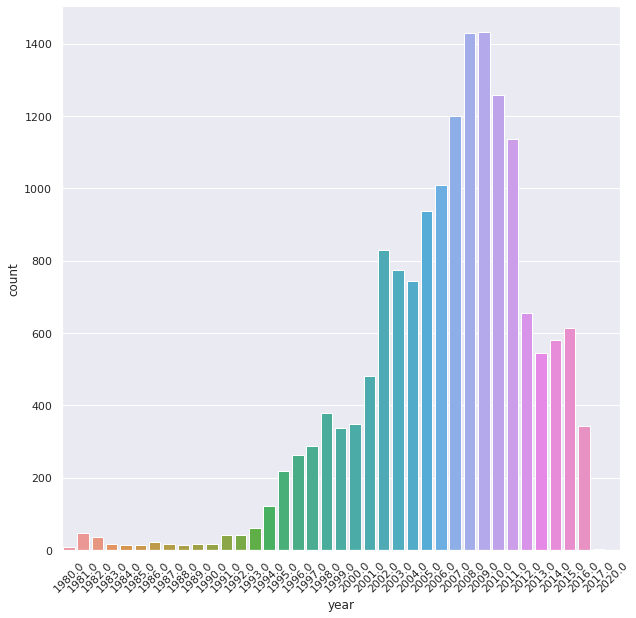

In [14]:
sns.set(rc={'figure.figsize':(10,10)})  #задали размеры графика
ax = sns.countplot(df.year) 
ax.tick_params(axis = 'x', rotation=45)


# Задание 3

На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [15]:
# сначала считаем долю выпущенных игр по плотформам, переименовываем результирующий столбец
# фильтруем по плотформам, у которых процент выпуска больше 7%, сортируем по убыванию
df_platform = df.platform.value_counts(normalize=True).reset_index().rename(columns={'index': 'platform_games'})
df_platform = df_platform.query('platform > 0.07').sort_values('platform', ascending=False).reset_index()
df_platform

,index,platform_games,platform
0,0,DS,0.130808
1,1,PS2,0.130563
2,2,PS3,0.080044
3,3,Wii,0.079185
4,4,X360,0.075747
5,5,PSP,0.073476
6,6,PS,0.072985


In [16]:
df_platform.platform_games.to_list() # делаем список для убобства

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

# Задание 4

Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [24]:
df.publisher.value_counts().reset_index().head(5) # считаем абсолютное значение выпускаемых игр по издательствам

,index,publisher
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823


# Задание 5

Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

In [25]:
# вывели описательную статистику по издательству Nintendo
df.query('publisher == "Nintendo"') \
    .describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


# Задание 6

Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

по оси x будет расположен жанр игры (Genre)
по оси у – объем продаж в Японии (JP_sales)
Взглянем на получившиеся боксплоты.

In [19]:
df_nintendo = df.query('publisher == "Nintendo"') #отобрали данные по нинтендо

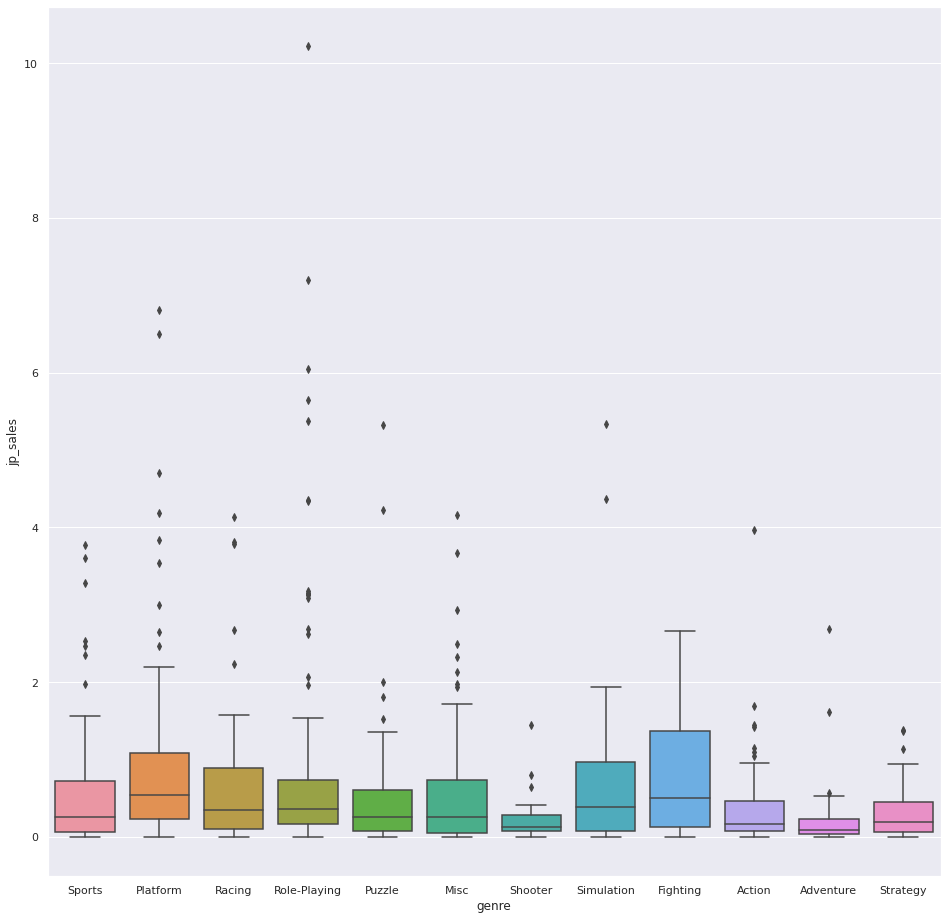

In [20]:
plt.figure(figsize=(16,16)) #построили график боксплот рапределения по жанрам в Японии
sns.boxplot(x="genre", y="jp_sales", data=df_nintendo)

# Задача 7

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков. 

In [43]:
# фильтруем по интересующим нас жанрам
# группируем по жанрам и годам, считаем сумму global_sales
df_global = df_nintendo.query('genre in ("Fighting", "Simulation", "Platform", "Racing", "Sports")') \
                .groupby(['genre', 'year']).global_sales.sum().reset_index()

In [44]:
df_global

,genre,year,global_sales
0,Fighting,1987.0,5.42
1,Fighting,1993.0,2.00
2,Fighting,1995.0,3.20
3,Fighting,1996.0,0.99
4,Fighting,1999.0,5.55
...,...,...,...
109,Sports,2010.0,2.18
110,Sports,2012.0,1.05
111,Sports,2013.0,1.69
112,Sports,2014.0,0.88


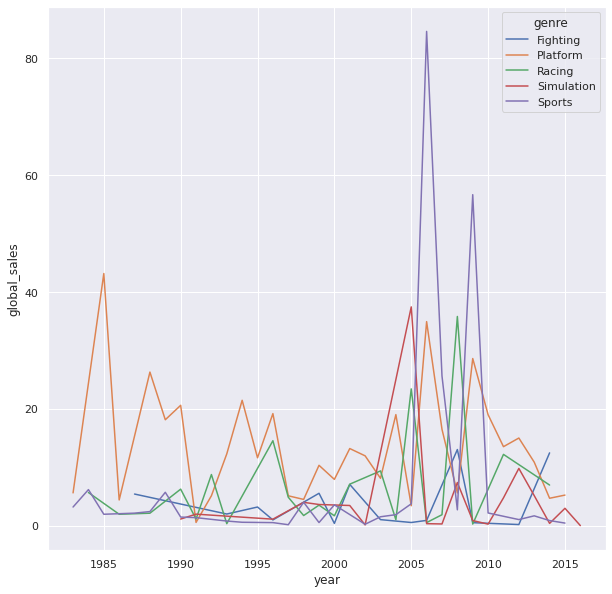

In [45]:
# визуализируем полученные данные
sns.lineplot(data=df_global, x="year", y="global_sales", hue="genre")